In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os

base_dir = 'C:\\Users\\gnesh\\OneDrive\\Desktop\\COINCENT\\dogs-vs-cats'
train_data_dir = os.path.join(base_dir, 'train')
test_data_dir = os.path.join(base_dir, 'test1')



# Building the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Data generators
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=3,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


save_path = 'C:\\Users\\gnesh\\OneDrive\\Desktop\\COINCENT\\dogs-vs-cats\\models\\dogs_vs_cats_model.h5'
model.save(save_path)



Found 346 images belonging to 1 classes.
Found 3974 images belonging to 1 classes.
Epoch 1/3
11/11 [==============================] - 44s 4s/step - loss: 0.0677 - accuracy: 0.9306 - val_loss: 4.2977e-20 - val_accuracy: 1.0000
Epoch 2/3
11/11 [==============================] - 36s 3s/step - loss: 2.2461e-27 - accuracy: 1.0000 - val_loss: 1.6540e-30 - val_accuracy: 1.0000
Epoch 3/3
11/11 [==============================] - 34s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.3436e-35 - val_accuracy: 1.0000


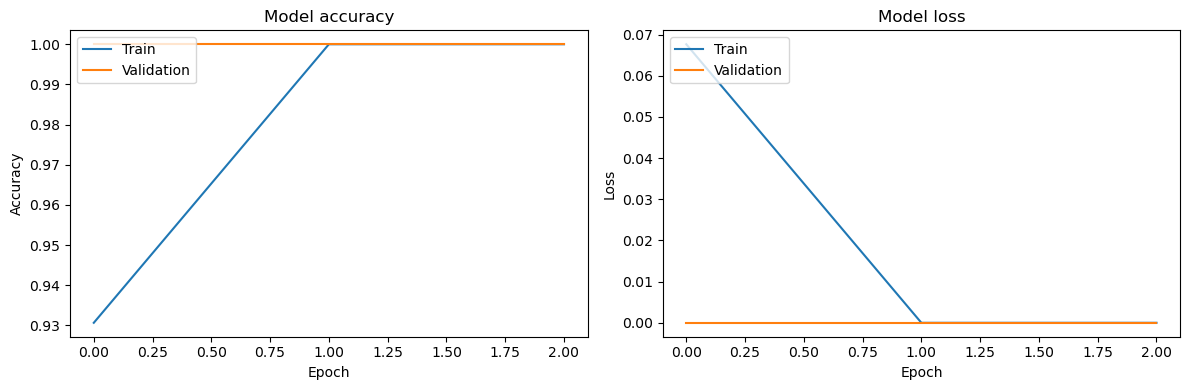

In [2]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 164ms/step
Prediction probabilities: [[0.]]


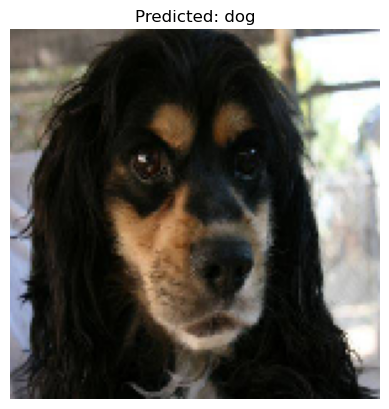

1/1 [==============================] - 0s 44ms/step
Prediction probabilities: [[0.]]


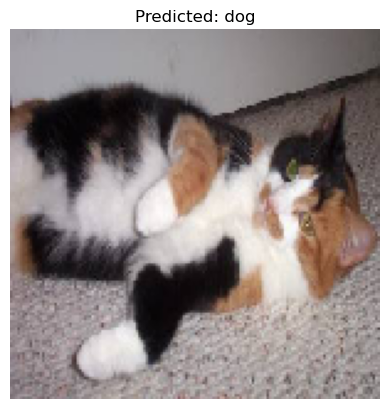

1/1 [==============================] - 0s 44ms/step
Prediction probabilities: [[0.]]


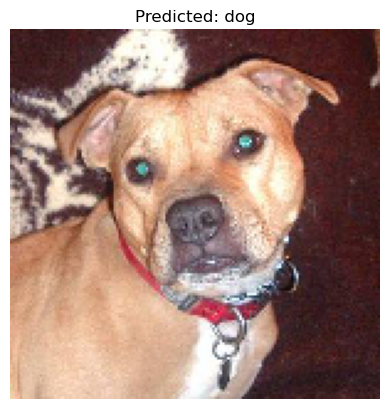

1/1 [==============================] - 0s 48ms/step
Prediction probabilities: [[0.]]


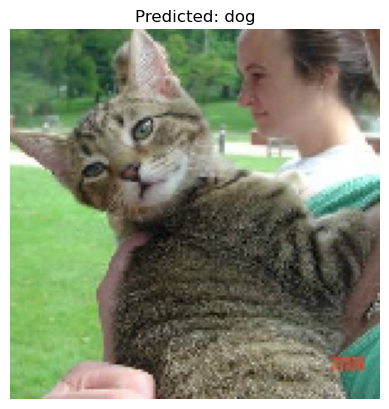

In [3]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Few test images for prediction
sample_images = [
    'C:\\Users\\gnesh\\OneDrive\\Desktop\\COINCENT\\dogs-vs-cats\\test1\\test1\\119.jpg',
    'C:\\Users\\gnesh\\OneDrive\\Desktop\\COINCENT\\dogs-vs-cats\\test1\\test1\\22.jpg',
    'C:\\Users\\gnesh\\OneDrive\\Desktop\\COINCENT\\dogs-vs-cats\\test1\\test1\\2.jpg',
    'C:\\Users\\gnesh\\OneDrive\\Desktop\\COINCENT\\dogs-vs-cats\\test1\\test1\\115.jpg'
]
# Load the trained model
model = tf.keras.models.load_model('C:\\Users\\gnesh\\OneDrive\\Desktop\\COINCENT\\dogs-vs-cats\\models\\dogs_vs_cats_model.h5')

def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array / 255.0

# Predictions and display results
for img_path in sample_images:
    processed_img = preprocess_image(img_path)
    prediction = model.predict(processed_img)
    predicted_class = 'cat' if prediction > 0.5 else 'dog'
    
   
    print(f'Prediction probabilities: {prediction}')
    
    img = image.load_img(img_path, target_size=(150, 150))
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()
